# Application example: scheduling of industrial processes. 

The current form of electricity markets allows for dynamic electricity pricing schemes, which therefore can be exploited by the industry. The accurate DAM price forecasting is a useful tool for manufacturing companies that have a flexible scheduling scheme, offering them a potential reduction of energy costs. The economic benefit originates from the Demand side Management. Industry can adjust its energy consumption by synchronizing production planning with the respected electricity price forecast. Due to the high volatility of the price, accurate forecasts offer big opportunities for minimizing not only electricity costs, but also possible penalty costs from the extensive usage of non-renewable energy sources or Co2 emissions. 

In this section, the application example of scheduling process for an industrial facility is given on a day-ahead scheduling horizon. Our paradigm is based on the usage of an industrial dataset, can be found in the link https://ieee-dataport.org/open-access/industrial-machines-dataset-electrical-load-disaggregation, which contains the energy usage of 8 different appliances with a frequency of sampling of 1s. Summing the energy needed in quarters, we retrieved the input of our optimizer. Cause of the complexity of the problems we used only 2 machines for a working period of 1 day. In this period the machines were not fully operational all the time needed. The energy cost is reflected by integrating the DAM price in which the industry procures energy for covering its needs and the load needed for each quarter varies. A simplified architecture showing the integration of the forecasting tool in the optimization process is depicted in the picture above. The forecasted DAM price is given as an input to the optimization problem for determining the optimal schedule. The solution is then implemented in the industrial facility with respect to the operational constraints. Finally, for the calculation of the real costs the actual DAM price is considered.

In the figures below, firstly the energy cost per quarter are presented, which is followed by a more complex thus informative figure. It shows the price(actual or forecasted) over the quarters, and also the respected Co2 emmisions and the percentage of the renewable energy integrated to the network this time period, both scaled for visualazation purposes. Finally, the periods that the respective machine is on are plotted. 

Our purpose is to minimiaze the difference between the actual cost, using the forecasted price and the actual price to schedule machine's operations. Even if the forecasts are not that accurate, the goal is to optimize the scheduler. In more details, capturing the general trend of the electricity price.


Observing the results, the performance of the forecaster is very good, close to the optimal. Even if the forecasted and the actual prices differ, the actual energy cost with the forecast based scheduling, is close to the optimal(the actual price based scheduling). However, there were also limitations in the various scenarios due to the computational complexity of the scheduling. As for baseline results, the machines are supposed to start working at 6:00, when usually shifts begin in the industry. The respective comulative score is our basis. Then the three electricity costs, for the 3 different cases are presented. 

In general, the results are very promising, unveiling the potential of the scheduling operations using electricity price forecasting for financial reasons. Additionally, the usage of such a scheduler not only reduces the energy costs, but also has an environmental impact. On the one hand, a penalty or a bonus can be added in the objective function of the scheduler, promoting the usage of green energy, through the integration of an emissions forecaster or the forecaster of the renewable energy percentage in the whole system. On the other hand, as it can be seen, the low price is a very good indicator of more green energy integrated to the system and less co2 emissions. Finnaly, they can invest in energy-saving equipment and optimize their energy usage. 


To conclude, the benefits are huge from the electricity price forecasting, especially for energy-intensive industrial loads which directly procure energy from wholesale markets, and also has a great potential for manufacturing companies that aim at reducing energy costs.


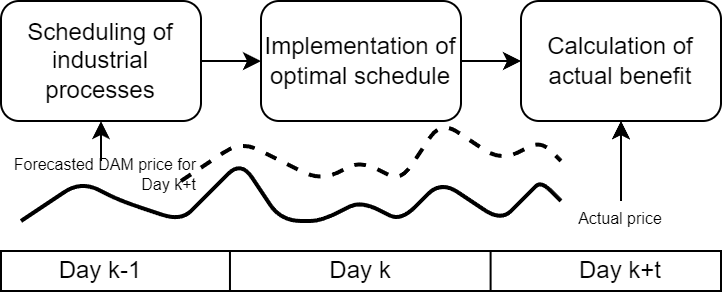

In [1]:
#load image in jupyter
from IPython.display import Image
Image(filename='Scheduler.png')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload all
from helper import *
from time_analysis import *
%autoreload
%aimport time_analysis
from __init__ import root_dir, data_path
plt.rcParams["figure.figsize"] = (5,3)
import os

In [6]:
book0=pd.read_csv(os.path.join(root_dir,'models','subdata','load_engine1.csv'),header=None)*0.000001#Load in MWh

FileNotFoundError: [Errno 2] No such file or directory: '/home/gpanagioto/GitHub/AdvBA/EPF_ABA23/models/subdata/load_engine1.csv'

In [5]:
# changing the files' path
book0=pd.read_csv(os.path.join('data','load_engine1.csv'),header=None)*0.000001#Load in MWh
book1=pd.read_csv(os.path.join(data_path,'clean','load_engine2.csv'),header=None)*0.000001#Load in MWh
price_a = pd.read_csv(os.path.join(data_path,'clean','data.csv'),delimiter=';',decimal=",",header=None).astype(float)#price data
price_f = pd.read_csv(os.path.join(data_path,'clean','data_forecasted.csv'),delimiter=';',decimal=",",header=None).astype(float)#forecasted price data
dfemi = pd.read_csv(os.path.join(data_path,'clean','data_Total_CO2_emissions.csv'),delimiter=';',decimal=",",header=None).astype(float)#emissions data
dfren = pd.read_csv(os.path.join(data_path,'clean','data_Renew_perc.csv'),delimiter=';',decimal=",",header=None).astype(float)#renewable data percentage



def read_txt(file):
    df=pd.read_csv(file,header=None)
    return df

df=read_txt(os.path.join(data_path,'clean','output_forecast.txt'))#read the output of the scheduler with continuous operation of the machine-forecasted price
dfa=read_txt(os.path.join(data_path,'clean','output_actua.txt'))#read the output of the scheduler with continuous operation of the machine-actual price
dfi=read_txt(os.path.join(data_path,'clean','output_for_ind.txt'))#read the output of the scheduler with individual task operation of the machine-forecasted price
dfai=read_txt(os.path.join(data_path,'clean','output_actua_ind.txt'))#read the output of the scheduler with individual task operation of the machine-actual price


df0=df.T
df0a=dfa.T
df0i=dfi.T
df0ai=dfai.T


FileNotFoundError: [Errno 2] No such file or directory: '/home/gpanagioto/GitHub/AdvBA/EPF_ABA23/dataset_management/data/clean/load_engine1.csv'

Total cost of operating the machine 1 114524.01257763499


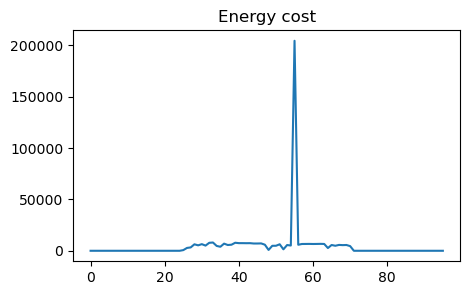

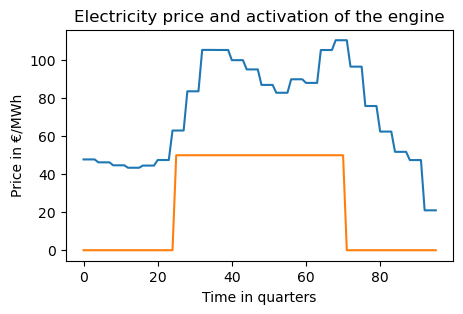

Total cost of operating the machine 2 530773.3223973501


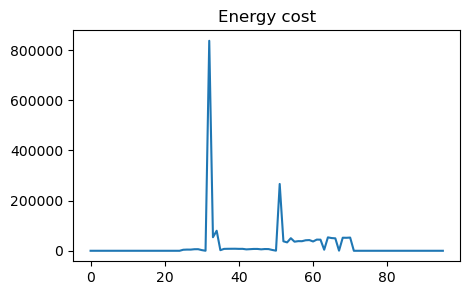

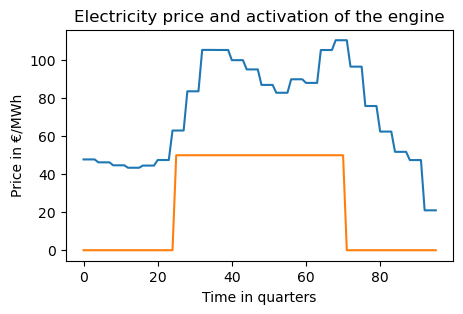

In [10]:
plots_normal(price_a,book0," 1")
plots_normal(price_a,book1," 2")

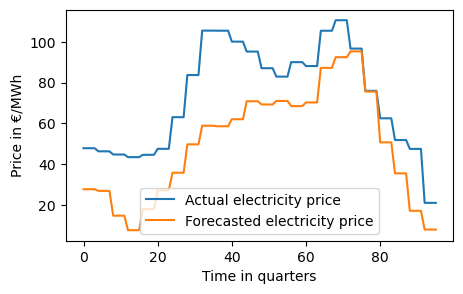

In [5]:
plt.plot(price_a,label="Actual electricity price")
plt.plot(price_f,label="Forecasted electricity price")
plt.legend()
plt.xlabel('Time in quarters')
plt.ylabel('Price in €/MWh')
plt.show()

Forecasted cost of the forecasted schedule
Total energy cost of machine1 89294.77046340998
Total energy cost of machine2 122157.77192691


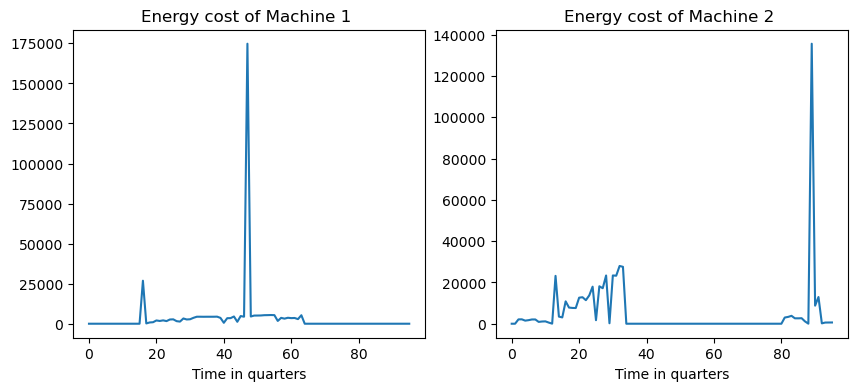

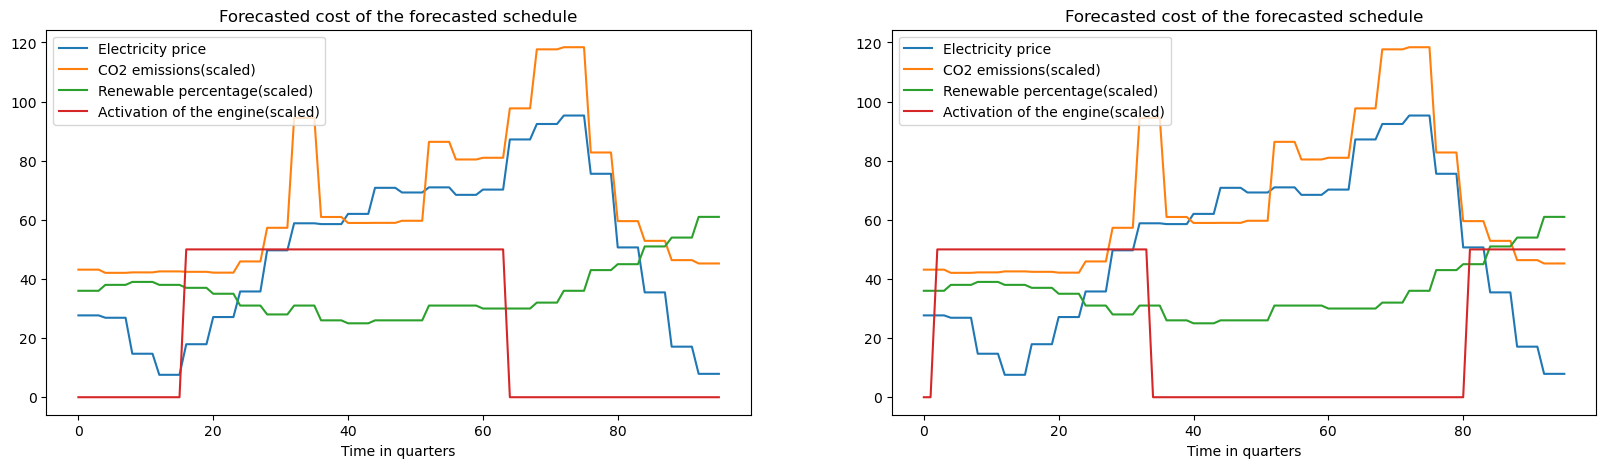

Actual cost of the forecasted schedule
Total energy cost of machine1 133761.624305265
Total energy cost of machine2 289096.5943335375


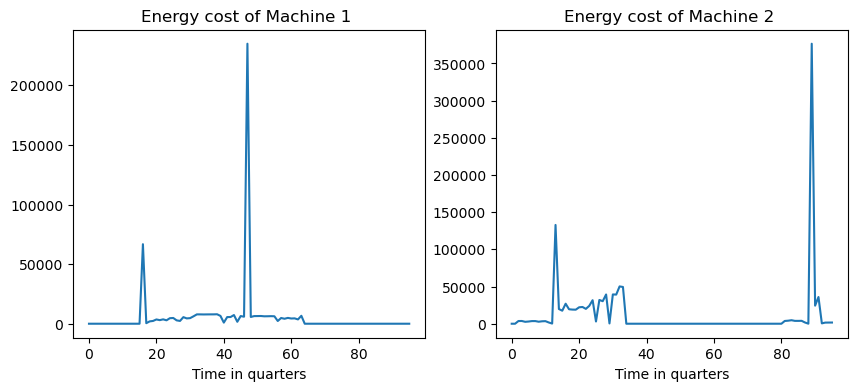

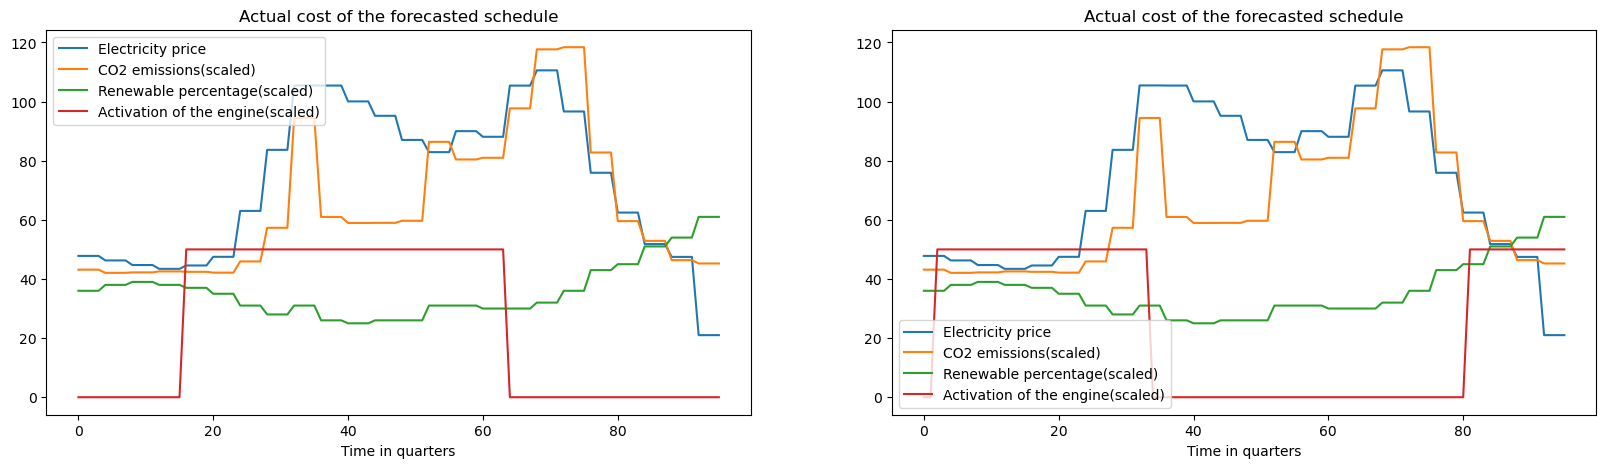

Actual cost of the actual schedule
Total energy cost of machine1 131038.29391035
Total energy cost of machine2 281512.7605849699


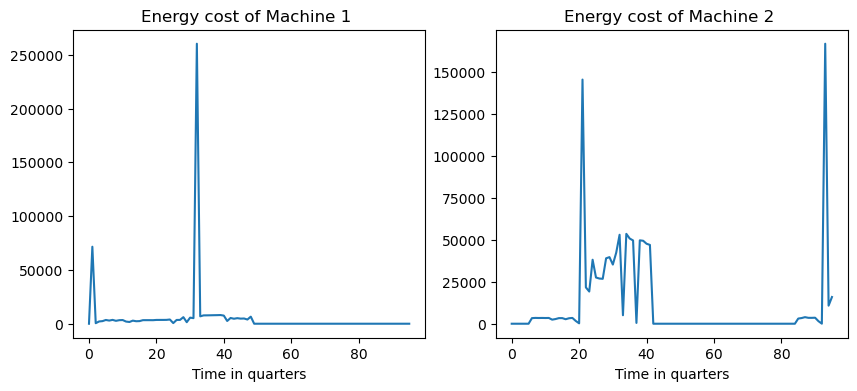

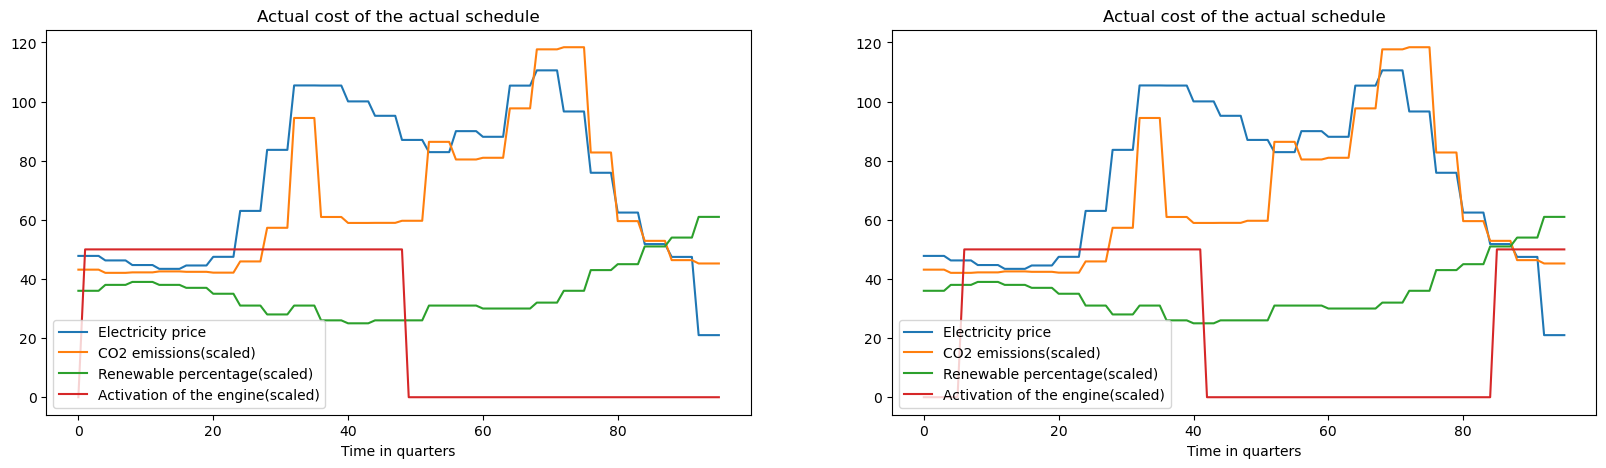

In [6]:

plots(price_f,df0,2,book0,book1,"Forecasted cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0,2,book0,book1,"Actual cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0a,2,book0,book1,"Actual cost of the actual schedule",dfemi,dfren)


Forecasted cost of the forecasted schedule
Total energy cost of machine1 29974.188847362504
Total energy cost of machine2 67793.8019934925


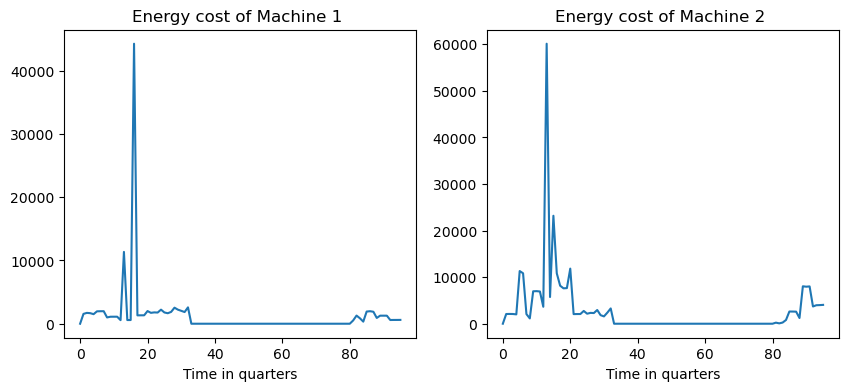

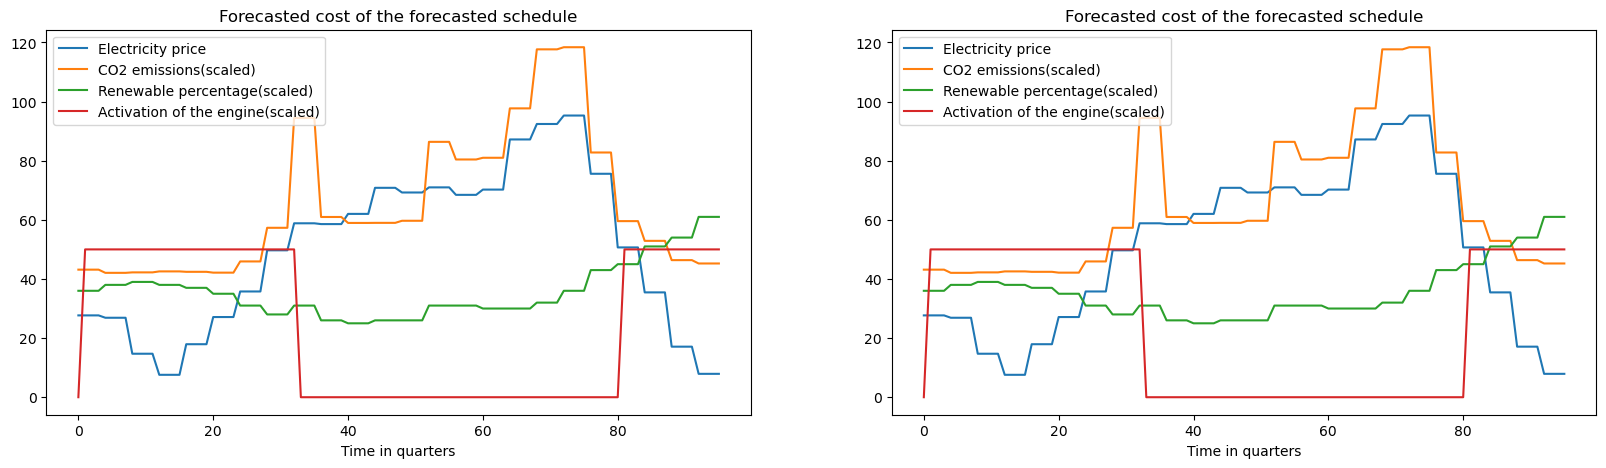

Actual cost of the forecasted schedule
Total energy cost of machine1 76505.4590926
Total energy cost of machine2 233248.09234546754


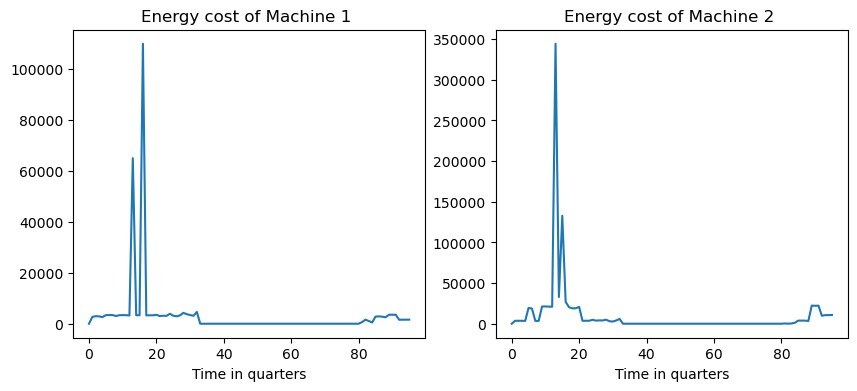

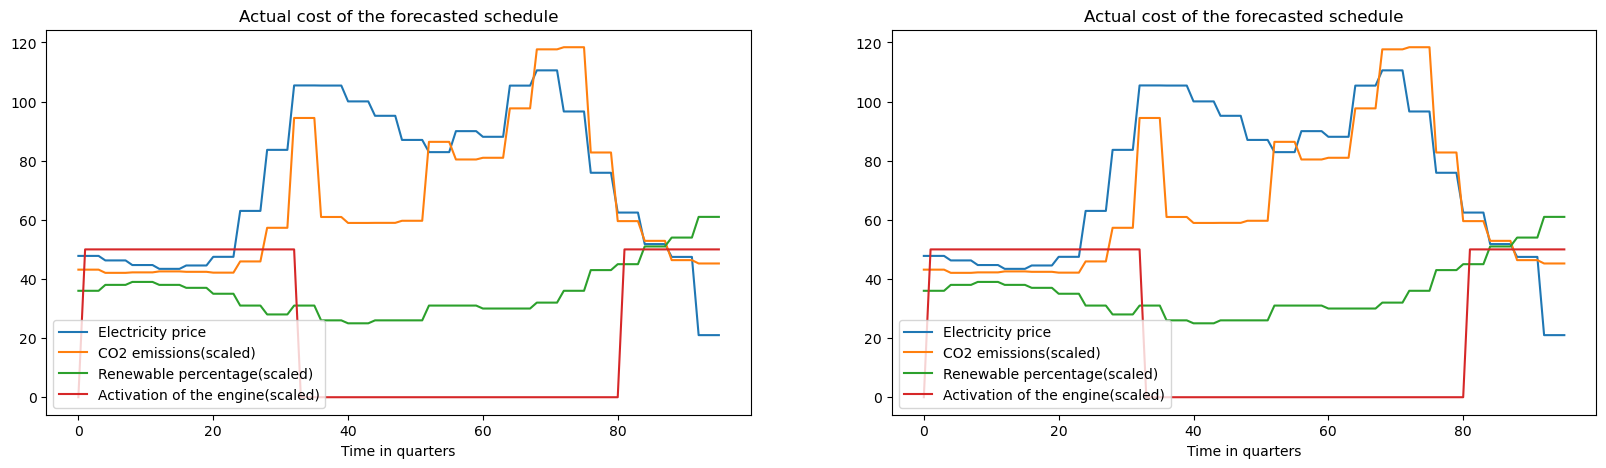

Actual cost of the actual schedule
Total energy cost of machine1 53355.37890728749
Total energy cost of machine2 172726.71441902505


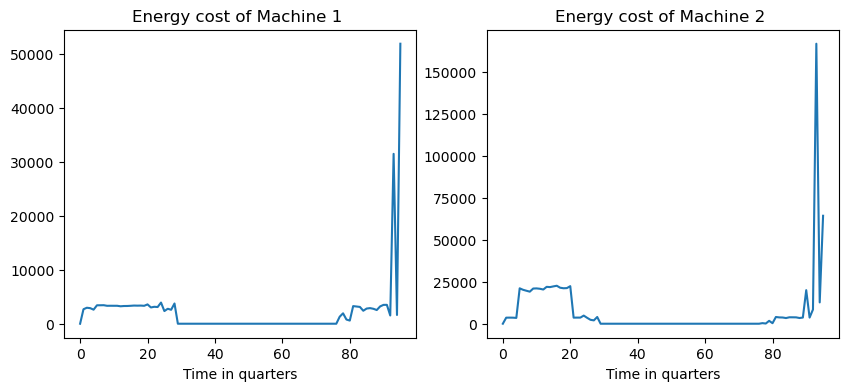

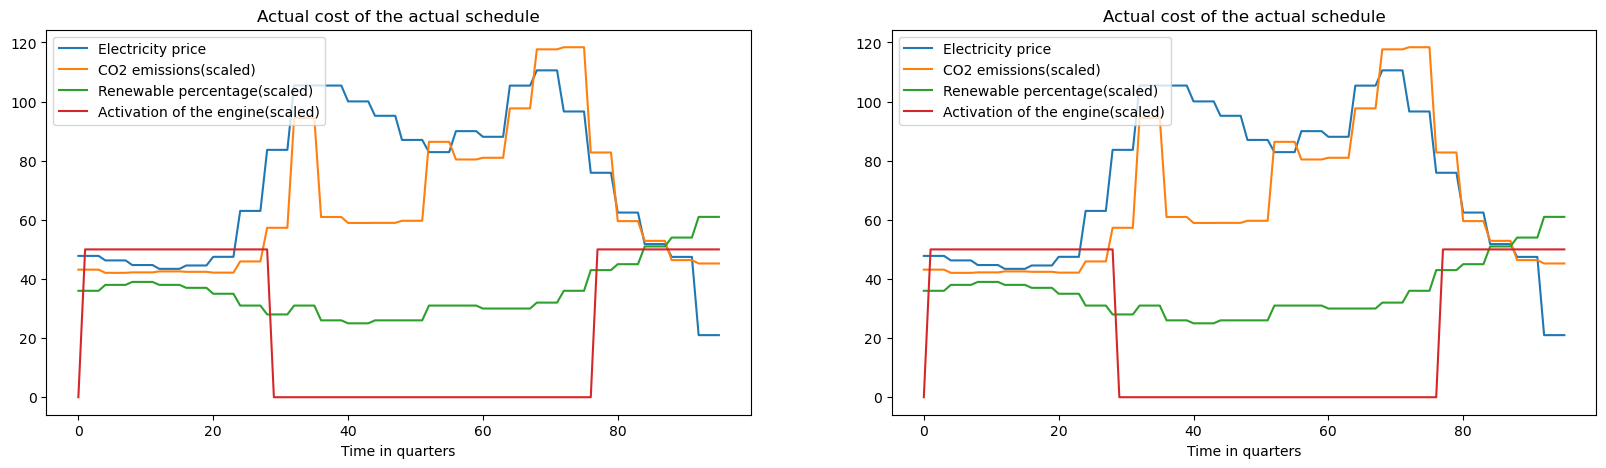

In [7]:
plots(price_f,df0i,2,book0,book1,"Forecasted cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0i,2,book0,book1,"Actual cost of the forecasted schedule",dfemi,dfren)
plots(price_a,df0ai,2,book0,book1,"Actual cost of the actual schedule",dfemi,dfren)